# Housing Inventory: Active Listing Count in Miami-Dade County, FL 

         DATE  Listings_Count  Year      Month
0  2017-01-01         20308.0  2017    January
1  2017-02-01         20814.0  2017   February
2  2017-03-01         20859.0  2017      March
3  2017-04-01         20692.0  2017      April
4  2017-05-01         22478.0  2017        May
..        ...             ...   ...        ...
76 2023-05-01          9240.0  2023        May
77 2023-06-01          9065.0  2023       June
78 2023-07-01          8915.0  2023       July
79 2023-08-01          9059.0  2023     August
80 2023-09-01          9735.0  2023  September

[81 rows x 4 columns]


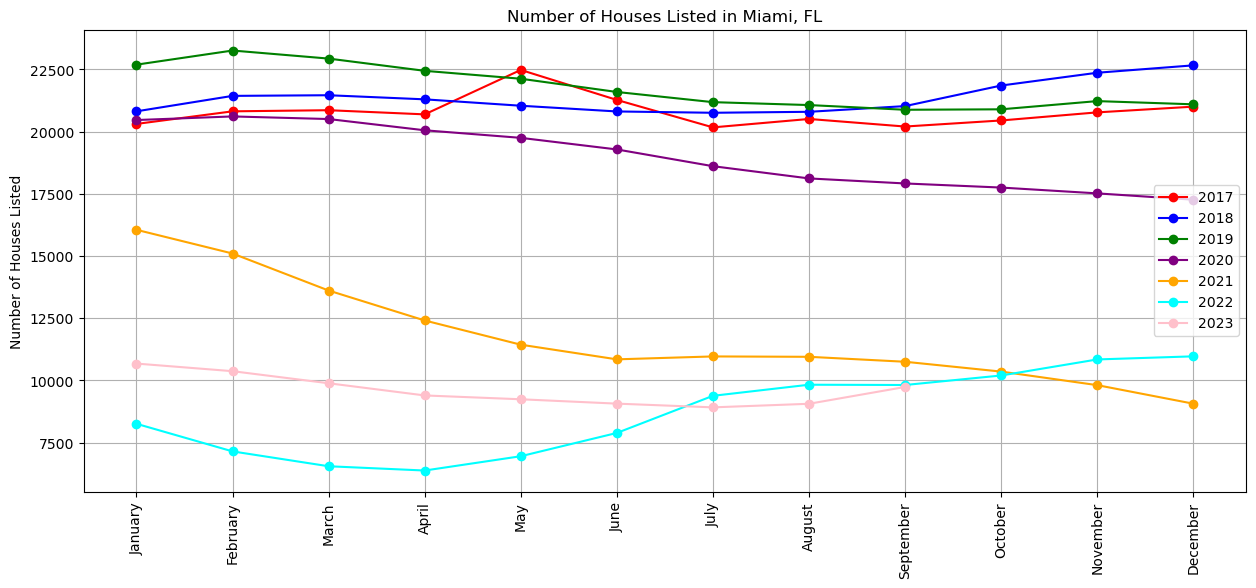

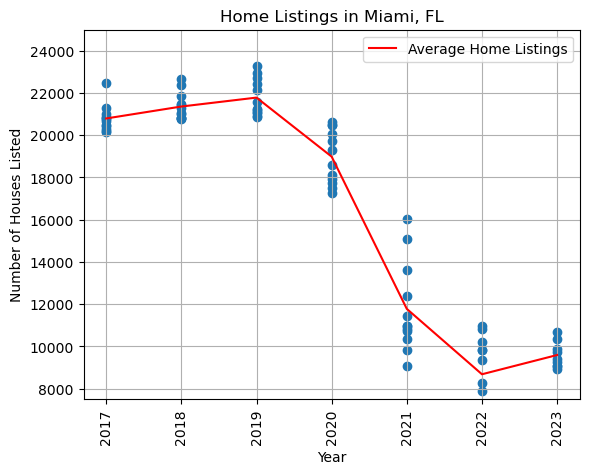

In [1]:
# Dependences
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as stats

housing_path = Path("ACTLISCOU12086.csv")
Housing_df = pd.read_csv(housing_path)

# Convert the 'DATE' column to datetime
Housing_df['DATE'] = pd.to_datetime(Housing_df['DATE'])

# Extract the year component and create a new 'Year' column
Housing_df['Year'] = Housing_df['DATE'].dt.year
Housing_df['Month'] = Housing_df['DATE'].dt.month_name()
# Drop the original 'DATE' column if it's no longer needed
#Housing_DF = Housing_df.drop(columns=['DATE'])
Housing_DF = Housing_df.rename(columns={'ACTLISCOU12086': 'Listings_Count'})

Avg_Housing_DS = Housing_DF.groupby('Year')['Listings_Count'].mean()
Avg_Housing_DS = Avg_Housing_DS.rename('Average Listing')

Avg_MHousing_DS = Housing_DF.groupby('Month')['Listings_Count'].mean()
Avg_MHousing_DS = Avg_MHousing_DS.rename('Average Monthly Listing')

# Print the updated DataFrame
print(Housing_DF)


year_to_color = {
  2017: 'red',
  2018: 'blue',
  2019: 'green',
  2020: 'purple',
  2021: 'orange',
  2022: 'cyan',
  2023: 'pink'
}

month_to_color = {
  'January': 'red',
  'February': 'blue',
  'March': 'green',
  'April': 'purple',
  'May': 'orange',
  'June': 'orange',
  'July': 'cyan',
  'August': 'pink',
  'September': 'yellow',
  'October': 'pink',
  'November': 'pink',
  'December': 'pink'
}
# Create a list of colors based on the year for each data point
colors = [year_to_color[year] for year in Housing_DF['Year']]
Mcolors = [month_to_color[month] for month in Housing_DF['Month']]

# Extract the x- and y-axes Listing by Month
y2M_axis = Housing_DF['Listings_Count']
x2M_axis = Housing_DF['Month']
plt.figure(figsize=(15,6))
# Add labels to each data point using the year
for year, color in year_to_color.items():
  year_data = Housing_DF[Housing_DF['Year'] == year]
  year_x = year_data['Month']
  year_y = year_data['Listings_Count']
  plt.plot(year_x, year_y, label=str(year), color=color,marker='o')

# Add a legend to the plot
plt.legend(loc="center right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels to the plot
plt.title('Number of Houses Listed in Miami, FL')
plt.ylabel('Number of Houses Listed')

# Add grid to the plot
plt.grid(True)

plt.show()

#Listings by Year
y1_axis = Housing_DF['Listings_Count']
x1_axis = Housing_DF['Year']
plt.scatter(x1_axis, y1_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')

y2_axis = Avg_Housing_DS
x2_axis = Avg_Housing_DS.index
plt.plot(x2_axis, y2_axis, color = 'red',label='Average Home Listings')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title('Home Listings in Miami, FL')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()





# Housing Inventory: Median Listings and Price in Miami-Dade County, FL

         DATE  Housing_Price      Month  Year
0  2017-01-01          347.0    January  2017
1  2017-02-01          349.0   February  2017
2  2017-03-01          353.0      March  2017
3  2017-04-01          353.0      April  2017
4  2017-05-01          356.0        May  2017
..        ...            ...        ...   ...
76 2023-05-01          561.0        May  2023
77 2023-06-01          563.0       June  2023
78 2023-07-01          558.0       July  2023
79 2023-08-01          556.0     August  2023
80 2023-09-01          552.0  September  2023

[81 rows x 4 columns]


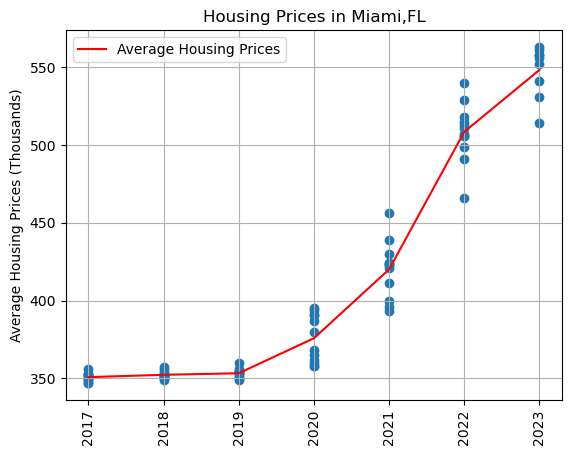

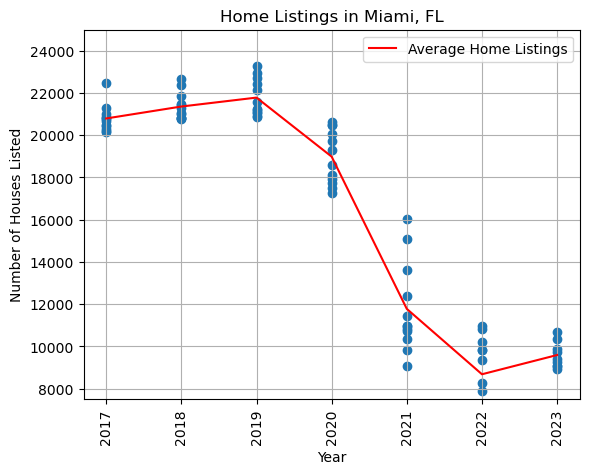

In [2]:
# Dependences
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

housPrice_path = Path("MEDLISPRIPERSQUFEE12086.csv")
housPrice_df = pd.read_csv(housPrice_path, delimiter =',')
# Convert the 'DATE' column to datetime
housPrice_df['DATE'] = pd.to_datetime(housPrice_df['DATE'])

# Extract the year component and create a new 'Year' column
housPrice_df['Month'] = housPrice_df['DATE'].dt.month_name()
housPrice_df['Year'] = housPrice_df['DATE'].dt.year
# Drop the original 'DATE' column if it's no longer needed
#HousPrice_DF = housPrice_df.drop(columns=['MEDLISPRIPERSQUFEE12086'])
housPrice_df = housPrice_df.rename(columns={'MEDLISPRIPERSQUFEE12086': 'Housing_Price'})

# Print the updated DataFrame
print(housPrice_df)

#Prices by Year
yaxis = housPrice_df['Housing_Price']
xaxis = housPrice_df["Year"]
plt.scatter(xaxis, yaxis)
plt.xticks(rotation=90)
plt.title('Housing Prices in Miami,FL')
plt.ylabel('Housing Prices (Thousands)')
Avg_housPrice_ds = housPrice_df.groupby('Year')['Housing_Price'].mean()
Avg_housPrice_ds = Avg_housPrice_ds.rename('Average_Listing')
Avg_housPrice_ds
y3axis = Avg_housPrice_ds
x3axis = Avg_housPrice_ds.index
plt.plot(x3axis, y3axis,color='red',label='Average Housing Prices')
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.title('Housing Prices in Miami,FL')
plt.ylabel('Average Housing Prices (Thousands)')
plt.grid(True)
plt.savefig("Housing Prices in Miami, FL")
plt.show()

#Listings by Year
y1_axis = Housing_DF['Listings_Count']
x1_axis = Housing_DF['Year']
plt.scatter(x1_axis, y1_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')

y2_axis = Avg_Housing_DS
x2_axis = Avg_Housing_DS.index
plt.plot(x2_axis, y2_axis, color = 'red',label='Average Home Listings')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title('Home Listings in Miami, FL')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)

plt.savefig("Home Listings in Miami, FL")
plt.show()



# Miami Housing Prices and Listings Statistics using an independent t-test

In [3]:
ttest = stats.ttest_ind(yaxis, y1_axis, equal_var=False)
print(ttest)
print()
print(f'The stats for the Average Housing Prices are: {Avg_housPrice_ds.describe()}')
print()
print(f'The stats for the Average Housing Listings are:{Avg_Housing_DS.describe()}')
print()
print(f'The p-value is less than the threshold ({ttest[1]} < .05), so we reject the null hypothesis. \
                        There is a statistically significant relationship between the two datasets')

TtestResult(statistic=-25.91052517694022, pvalue=1.133122113812959e-40, df=80.02837781077473)

The stats for the Average Housing Prices are: count      7.000000
mean     415.519841
std       81.565099
min      350.750000
25%      352.750000
50%      375.750000
75%      464.208333
max      548.222222
Name: Average_Listing, dtype: float64

The stats for the Average Housing Listings are:count        7.000000
mean     16138.876984
std       5864.328174
min       8681.833333
25%      10685.152778
50%      18985.666667
75%      21076.250000
max      21781.833333
Name: Average Listing, dtype: float64

The p-value is less than the threshold (1.133122113812959e-40 < .05), so we reject the null hypothesis.                         There is a statistically significant relationship between the two datasets


# Housing Inventory: Median Listing Price in Florida

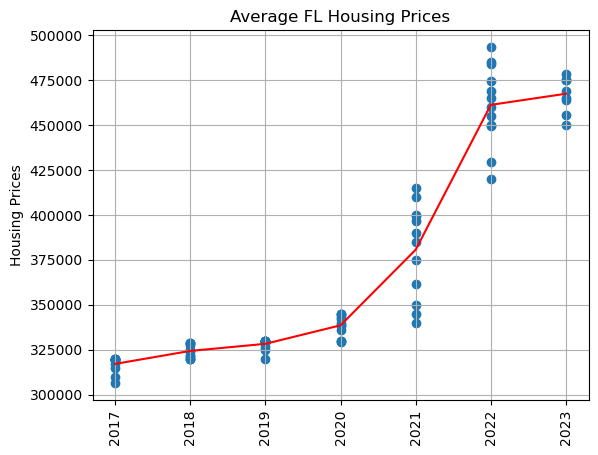

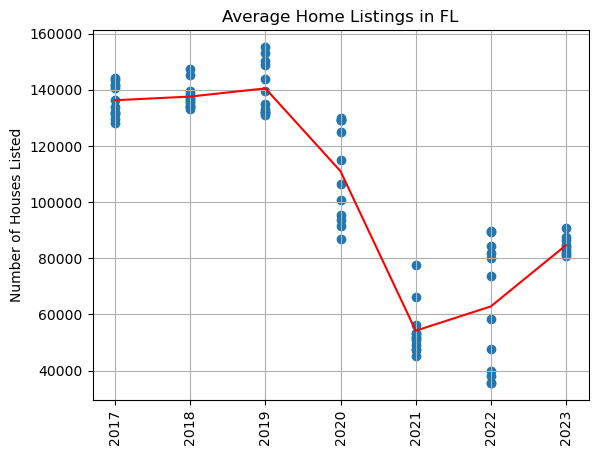

         DATE  FL_Listings_Count  Year      Month
0  2017-01-01           141540.0  2017    January
1  2017-02-01           144284.0  2017   February
2  2017-03-01           143568.0  2017      March
3  2017-04-01           141600.0  2017      April
4  2017-05-01           140748.0  2017        May
..        ...                ...   ...        ...
76 2023-05-01            80905.0  2023        May
77 2023-06-01            81676.0  2023       June
78 2023-07-01            83092.0  2023       July
79 2023-08-01            84883.0  2023     August
80 2023-09-01            90722.0  2023  September

[81 rows x 4 columns]
count        81.000000
mean     104560.333333
std       36614.342568
min       35590.000000
25%       80905.000000
50%      125106.000000
75%      134970.000000
max      155208.000000
Name: FL_Listings_Count, dtype: float64
         DATE  FL_Housing_Prices  Year      Month
0  2017-01-01           306475.0  2017    January
1  2017-02-01           309950.0  2017   February
2  

In [24]:

# Dependences
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

FLhousPrice_path = Path("MEDLISPRIFL.csv")
FLhousPrice_df = pd.read_csv(FLhousPrice_path)

# Convert the 'DATE' column to datetime
FLhousPrice_df['DATE'] = pd.to_datetime(Housing_df['DATE'])

# Extract the year component and create a new 'Year' column
FLhousPrice_df['Year'] = FLhousPrice_df['DATE'].dt.year
FLhousPrice_df['Month'] = FLhousPrice_df['DATE'].dt.month_name()
# Drop the original 'DATE' column if it's no longer needed
#Housing_DF = Housing_df.drop(columns=['DATE'])
FLhousPrice_df = FLhousPrice_df.rename(columns={'MEDLISPRIFL': 'FL_Housing_Prices'})



#Listings by Year
y1_axis = FLhousPrice_df['FL_Housing_Prices']
x1_axis = FLhousPrice_df['Year']
plt.scatter(x1_axis, y1_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.ylabel('Number of Houses Listed')
#plt.ylim(7500,25000)
plt.grid(True)


#Average Listings by Year
Avg_FLhousPrice_ds = FLhousPrice_df.groupby('Year')['FL_Housing_Prices'].mean()
Avg_FLhousPrice_ds = Avg_FLhousPrice_ds.rename('Average_FL_Housing_Prices')

y2_axis = Avg_FLhousPrice_ds
x2_axis = Avg_FLhousPrice_ds.index
plt.plot(x2_axis, y2_axis, color='red')
plt.xticks(rotation=90)
plt.title('Average FL Housing Prices')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.show()

FLhousing_path = Path("ACTLISCOUFL.csv")
FLhousing_df = pd.read_csv(FLhousing_path)

# Convert the 'DATE' column to datetime
FLhousing_df['DATE'] = pd.to_datetime(Housing_df['DATE'])

# Extract the year component and create a new 'Year' column
FLhousing_df['Year'] = FLhousing_df['DATE'].dt.year
FLhousing_df['Month'] = FLhousing_df['DATE'].dt.month_name()
# Drop the original 'DATE' column if it's no longer needed
#Housing_DF = Housing_df.drop(columns=['DATE'])
FLhousing_df = FLhousing_df.rename(columns={'ACTLISCOUFL': 'FL_Listings_Count'})



#Listings by Year
y1a_axis = FLhousing_df['FL_Listings_Count']
x1a_axis = FLhousing_df['Year']
plt.scatter(x1a_axis, y1a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.ylabel('Number of Houses Listed')
plt.grid(True)


#Average Listings by Year
Avg_FLhousing_ds = FLhousing_df.groupby('Year')['FL_Listings_Count'].mean()
Avg_FLhousing_ds = Avg_FLhousing_ds.rename('Average_FL_Listing')

y2_axis = Avg_FLhousing_ds
x2_axis = Avg_FLhousing_ds.index
plt.plot(x2_axis, y2_axis, color='red')
plt.xticks(rotation=90)
plt.title('Average Home Listings in FL')
plt.ylabel('Number of Houses Listed')
plt.grid(True)
plt.show()

# Print the updated DataFrame
print(FLhousing_df)
print(FLhousing_df['FL_Listings_Count'].describe())

# Print the updated DataFrame
print(FLhousPrice_df)
print(FLhousPrice_df['FL_Housing_Prices'].describe())

# Miami vs FL Housing Prices Statistics using a one sample t-test.

In [14]:
ttest_MIA_FL_Price = stats.ttest_1samp(housPrice_df['Housing_Price'], FLhousPrice_df['FL_Housing_Prices'].mean())
print(ttest_MIA_FL_Price)
print()
print(f'The stats for the Average Housing Prices in Miami are: {Avg_housPrice_ds.describe()}')
print()
print(f'The stats for the Average Housing Prices in FL are:{Avg_FLhousPrice_ds.describe()}')
print()
print(f'The p-value is less than the threshold ({ttest_MIA_FL_Price[1]} < .05), so we reject the null hypothesis. \
                        There is a statistically significant relationship between the housing prices in miami and Florida')

TtestResult(statistic=-45085.19922429465, pvalue=5.6223423917649e-298, df=80)

The stats for the Average Housing Prices are: count      7.000000
mean     415.519841
std       81.565099
min      350.750000
25%      352.750000
50%      375.750000
75%      464.208333
max      548.222222
Name: Average_Listing, dtype: float64

The stats for the Average Housing Listings are:count         7.000000
mean     373934.555556
std       65118.224885
min      317088.333333
25%      326285.166667
50%      338565.250000
75%      420939.541667
max      467438.888889
Name: Average_FL_Housing_Prices, dtype: float64

The p-value is less than the threshold (5.6223423917649e-298 < .05), so we reject the null hypothesis.                         There is a statistically significant relationship between the housing prices in miami and Florida


# Miami vs FL House Listing Statistics using a one sample t-test.

In [20]:
ttest_MIA_FL_Listing = stats.ttest_1samp(Housing_DF['Listings_Count'], FLhousing_df['FL_Listings_Count'].mean())
print(ttest_MIA_FL_Listing)
print()
print(f'The stats for the Average Housing Lisitings in Miami are: {Avg_Housing_DS.describe()}')
print()
print(f'The stats for the Average Housing Listings in FL are:{Avg_FLhousing_ds.describe()}')
print()
print(f'The p-value is less than the threshold ({ttest_MIA_FL_Listing[1]} < .05), so we reject the null hypothesis. \
                        There is a statistically significant relationship between the house lisitngs in miami and Florida')

TtestResult(statistic=-143.07230294752048, pvalue=3.64131216414207e-98, df=80)

The stats for the Average Housing Lisitings in Miami are: count        7.000000
mean     16138.876984
std       5864.328174
min       8681.833333
25%      10685.152778
50%      18985.666667
75%      21076.250000
max      21781.833333
Name: Average Listing, dtype: float64

The stats for the Average Housing Listings in FL are:count         7.000000
mean     103848.746032
std       36727.440657
min       54203.333333
25%       73738.444444
50%      110986.000000
75%      136904.208333
max      140466.583333
Name: Average_FL_Listing, dtype: float64

The p-value is less than the threshold (3.64131216414207e-98 < .05), so we reject the null hypothesis.                         There is a statistically significant relationship between the house lisitngs in miami and Florida


# Ignore

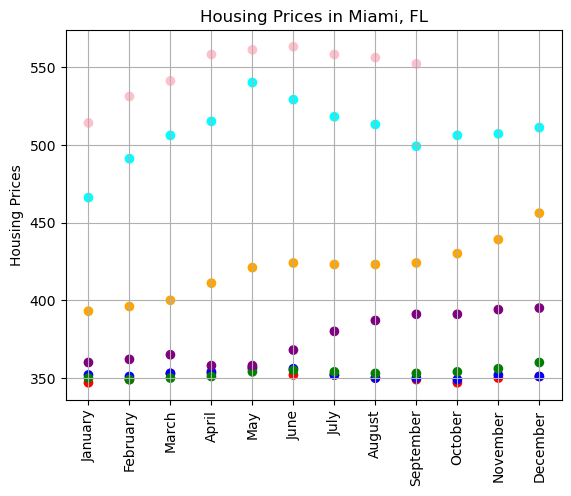

In [7]:
#Prices by Month
yM_axis = housPrice_df['Housing_Price']
xM_axis = housPrice_df['Month']

# Create a dictionary to map years to colors
year_to_color = {
    2017: 'red',
    2018: 'blue',
    2019: 'green',
    2020: 'purple',
    2021: 'orange',
    2022: 'cyan',
    2023: 'pink'
}
# Create a list of colors based on the year for each data point
color = [year_to_color[year] for year in housPrice_df['Year']]

# Create the scatter plot with custom colors
plt.scatter(xM_axis, yM_axis, c=color)
plt.xticks(rotation=90)
plt.title('Housing Prices in Miami, FL')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.show()


In [8]:

'''#Average Listing by Month
y2a_axis = Avg_MHousing_DS
x2a_axis = Avg_MHousing_DS.index
#plt.scatter(x2a_axis, y2a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)

Avg_MHousing_ds = Housing_DF.groupby('Month')['Listings_Count'].mean()
Avg_MHousing_ds = Avg_MHousing_ds.rename('Average Monthly Listing')

y2a_axis = Avg_MHousing_ds
x2a_axis = Avg_MHousing_ds.index
plt.scatter(x2a_axis, y2a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()'''

"#Average Listing by Month\ny2a_axis = Avg_MHousing_DS\nx2a_axis = Avg_MHousing_DS.index\n#plt.scatter(x2a_axis, y2a_axis)\nplt.xticks(rotation=90)\nplt.title('Number of Houses Listed in Miami, FL')\nplt.xlabel('Year')\nplt.ylabel('Number of Houses Listed')\nplt.ylim(7500,25000)\nplt.grid(True)\n\nAvg_MHousing_ds = Housing_DF.groupby('Month')['Listings_Count'].mean()\nAvg_MHousing_ds = Avg_MHousing_ds.rename('Average Monthly Listing')\n\ny2a_axis = Avg_MHousing_ds\nx2a_axis = Avg_MHousing_ds.index\nplt.scatter(x2a_axis, y2a_axis)\nplt.xticks(rotation=90)\nplt.title('Number of Houses Listed in Miami, FL')\nplt.xlabel('Year')\nplt.ylabel('Number of Houses Listed')\nplt.ylim(7500,25000)\nplt.grid(True)\nplt.show()"

,Month,home_value
0,April,16094.14286
1,August,16202.12500
2,December,17482.85714
3,February,16961.28571
4,January,17036.71429
5,July,16163.37500
6,June,15821.71429
7,March,16543.00000
8,May,16144.85714
9,November,17512.71429


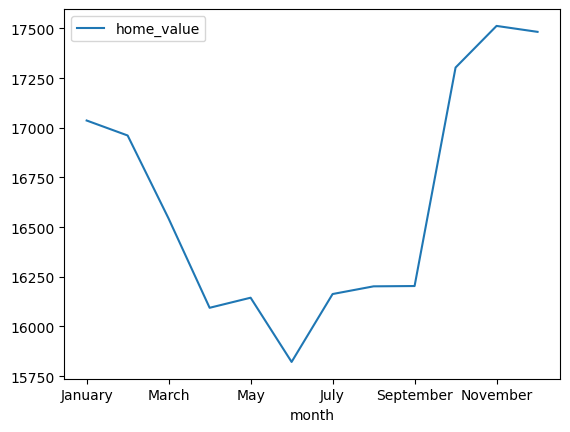

In [9]:
import pandas as pd


df = pd.read_csv('month_values.csv - Sheet1.csv', names=['month', 'home_value'], skiprows=1)
df.head()

#For some reason a lot of empty space in the values
df['month']=df['month'].str.strip()

# In[5]:
month_dict ={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# In[6]:

df['monthnum']=df.month.map(month_dict)

# In[7]:

df =df.sort_values(by='monthnum')

# In[8]:

df.plot(x='month', y='home_value')

# In[9]:

ds = pd.read_csv('month_values.csv - Sheet1.csv', index_col=0, names=['home_value'], skiprows=1)

# In[10]:
ds = ds.reset_index().rename(columns={'index':'Month'})
#repeate process as above from this point
ds
